CNN Modell wird hier aufgebaut und auf Bilder mit 128x128 angewandt

In [17]:
import os
import tensorflow as tf 
from tensorflow import keras 
from keras.regularizers import L2

import matplotlib.pyplot as plt
import numpy as np

In [18]:
img_height = 128
img_width =128
batch_size=32


In [19]:
#import train Dataset with seperate validation Dataset

ds_train=tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data_augumentation/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

ds_val=tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN_Data/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

Found 9343 files belonging to 6 classes.
Using 7475 files for training.
Found 2156 files belonging to 6 classes.
Using 431 files for validation.


In [20]:
#Klassennamen ausgeben und speichern
class_names=ds_train.class_names
print(class_names)

['Karotte', 'Karotte_Trieb', 'Kartoffel', 'Kartoffel_Trieb', 'Zwiebel', 'Zwiebel_Trieb']


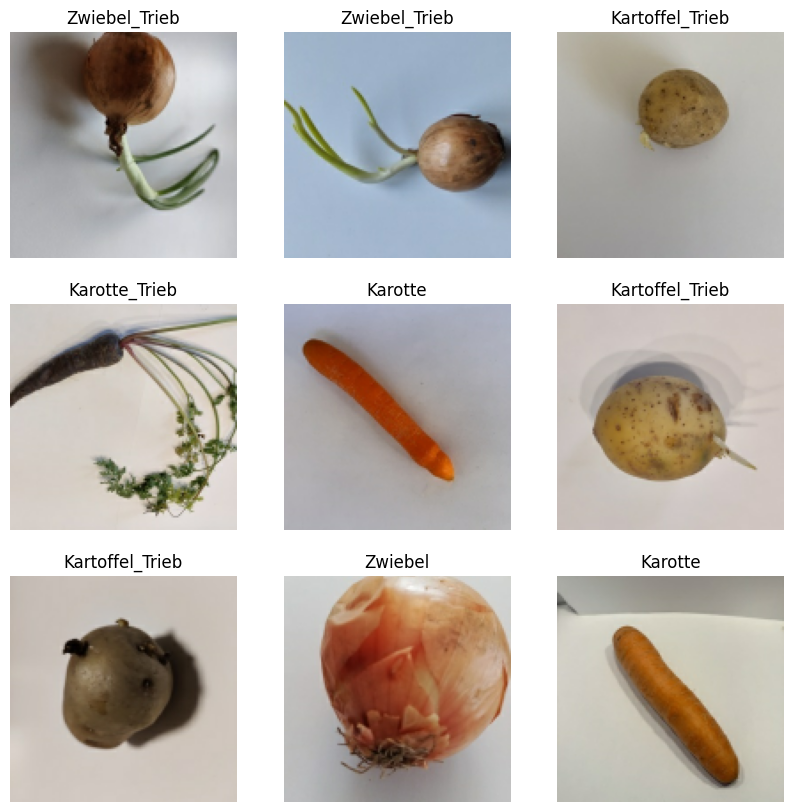

In [21]:
#Bilder einfach mal ausgeben lassen
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [22]:
#batch und Bildgrößen ausgeben lassen
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [23]:
#Modell definieren 2 Conv2D layer und am ende ein voll vernetztes 
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu',padding='same', kernel_regularizer=L2(0.01),input_shape=[img_height,img_width, 3]),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(filters=64,kernel_size=3, activation='relu',padding='same', kernel_regularizer=L2(0.01)),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(6, activation='softmax')
])


In [24]:
#Modell Kompilieren
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [25]:
#Modell trainieren
epoch=30
history=model.fit(
  ds_train,
  validation_data=ds_val,
  epochs=epoch,
)

Epoch 1/30


234/234 [==============================] - 85s 362ms/step - loss: 1.3817 - accuracy: 0.5660 - val_loss: 0.9231 - val_accuracy: 0.7378
Epoch 2/30
234/234 [==============================] - 82s 351ms/step - loss: 0.7612 - accuracy: 0.7767 - val_loss: 0.5596 - val_accuracy: 0.8561
Epoch 3/30
234/234 [==============================] - 89s 379ms/step - loss: 0.5582 - accuracy: 0.8425 - val_loss: 0.4221 - val_accuracy: 0.8933
Epoch 4/30
234/234 [==============================] - 92s 393ms/step - loss: 0.4370 - accuracy: 0.8841 - val_loss: 0.4054 - val_accuracy: 0.8840
Epoch 5/30
234/234 [==============================] - 93s 396ms/step - loss: 0.3997 - accuracy: 0.8894 - val_loss: 0.3212 - val_accuracy: 0.9304
Epoch 6/30
234/234 [==============================] - 92s 394ms/step - loss: 0.3564 - accuracy: 0.9121 - val_loss: 0.3333 - val_accuracy: 0.9072
Epoch 7/30
234/234 [==============================] - 92s 394ms/step - loss: 0.2859 - accuracy: 0.9320 - val_loss: 0.2532 - val_accuracy: 0.9

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 65536)            

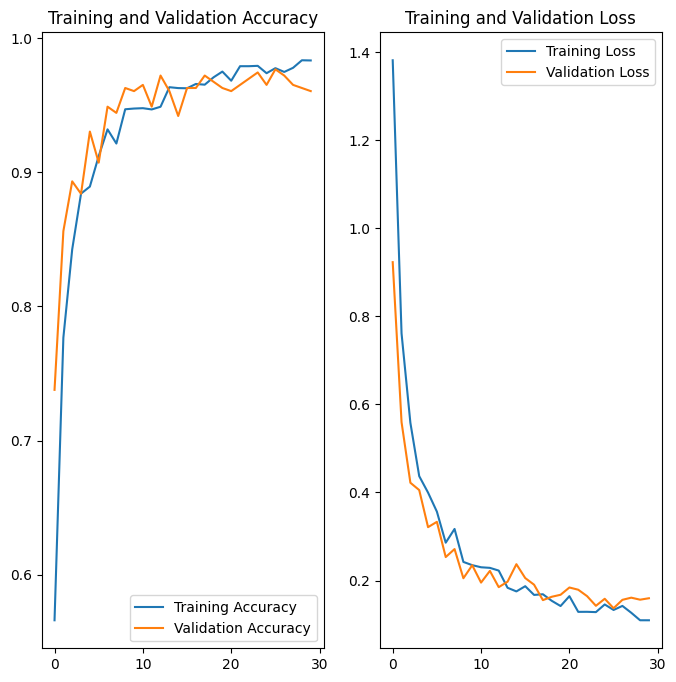

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
ds_test=tf.keras.utils.image_dataset_from_directory(
    'D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN/Test_set/',
    color_mode='rgb',
    labels='inferred',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,   
)

Found 339 files belonging to 6 classes.


In [29]:
result=model.evaluate(ds_test)

11/11 [==============================] - 5s 150ms/step - loss: 1.0271 - accuracy: 0.8201


In [30]:
test=tf.keras.utils.load_img('D:/Dokumente/Master-Studium/Semester3/test1.jpg', target_size=(img_height, img_width))
test_array = tf.keras.utils.img_to_array(test)
test_array = tf.expand_dims(test_array, 0)

In [31]:
predictions = model.predict(test_array)
score = tf.nn.softmax(predictions[0])
print(predictions)
print(
    "This image most likely belongs to {} "
    .format(class_names[np.argmax(score)])
)

1/1 [==============================] - 0s 121ms/step
[[1.0000000e+00 1.9925474e-17 2.9205918e-35 0.0000000e+00 2.3047380e-18
  7.8528295e-32]]
This image most likely belongs to Karotte 


In [33]:
model.save('D:/Dokumente/Master-Studium/Semester3/KI_Projekt/CNN/model_final.keras')